# Graphics for oetjen figure

In [1]:
import sys
import os
path_helper = ["c:\\","Users","vfriedrich","projects","gating","reproducibility_cleaned","helper"]
sys.path.append(os.path.join(*path_helper))
import helper_reproducibility as hr
import convexgating as cg
import scanpy as sc
import anndata as ann
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sns
import os
import re
from pywget import wget
print(sys.executable)

C:\Users\vfriedrich\Anaconda3\envs\gating_env_local_parameter_option\python.exe


In [2]:
#branch add_parameter_option

In [3]:
pre = 'P03_summary'
start_time = hr.get_time()

In [4]:
path_input_data = hr.return_input_data_path() 
path_output_data = hr.return_output_data_path()
path_output_script = os.path.join(path_output_data,pre)
hr.make_path(os.path.join(path_output_script))
path_gating_hull =  'C:\\Users\\vfriedrich\\projects\\gating\\reproducibility_cleaned\\supp_Figure_oetjen'

In [5]:
samples = ['A','B','C','H','J','O','T','U'] 
cluster_lvl2 = ['cluster_T cell','cluster_NK cell']
cluster_lvl3 = ['cluster_CD4+ T cell','cluster_CD8+ T cell','cluster_Double negative T cell','cluster_Double positive T cell',
 'cluster_NK cell']
cluster_lvl4 = ['cluster_CCR7- CD4+ T cell',
 'cluster_CCR7+ CD4+ T cell',
 'cluster_CCR7- CD8+ T cell',
 'cluster_CCR7+ CD8+ T cell',
'cluster_Double negative T cell',
'cluster_Double positive T cell',
'cluster_NK cell']


cluster_lvl5 = ['cluster_CD4+ CM T cell','cluster_CD4+ TEMRA','cluster_CD8+ CM T cell','cluster_CD8+ TE T cell','cluster_Double negative T cell','cluster_NK cell','cluster_Naive CD8+ T cell',
'cluster_CD4+ EM T cell','cluster_CD4+ TRM T cell','cluster_CD8+ EM T cell','cluster_CD8+ TRM T cell','cluster_Double positive T cell','cluster_Naive CD4+ T cell']

# level 2

In [6]:
gating_dir_lvl2 = os.path.join(path_gating_hull,'P02_cell_type_lvl2_hull')
overview_lvl2 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in cluster_lvl2:
        perf_loc = os.path.join(gating_dir_lvl2,sample,cluster,'performance.csv')
        f1,recall,precision,hierarchy = hr.get_f1_hierarch(perf_loc)
        overview_lvl2 = overview_lvl2.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))
overview_lvl2['level'] = 'lvl2'
    

# level 3

In [7]:
gating_dir_lvl3 = os.path.join(path_gating_hull,'P02_cell_type_lvl3_hull')
overview_lvl3 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in cluster_lvl3:
        perf_loc = os.path.join(gating_dir_lvl3,sample,cluster,'performance.csv')
        f1,recall,precision,hierarchy = hr.get_f1_hierarch(perf_loc)
        overview_lvl3 = overview_lvl3.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))
overview_lvl3['level'] = 'lvl3'

# level 4

In [8]:
gating_dir_lvl4 = os.path.join(path_gating_hull,'P02_cell_type_lvl4_hull')
overview_lvl4 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in cluster_lvl4:
        perf_loc = os.path.join(gating_dir_lvl4,sample,cluster,'performance.csv')
        f1,recall,precision,hierarchy = hr.get_f1_hierarch(perf_loc)
        overview_lvl4 = overview_lvl4.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))
overview_lvl4['level'] = 'lvl4'

# level 5

In [9]:
gating_dir_lvl5 = os.path.join(path_gating_hull,'P02_cell_type_lvl5_hull')
overview_lvl5 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in cluster_lvl5:
        perf_loc = os.path.join(gating_dir_lvl5,sample,cluster,'performance.csv')
        f1,recall,precision,hierarchy = hr.get_f1_hierarch(perf_loc)
        overview_lvl5 = overview_lvl5.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))
overview_lvl5['level'] = 'lvl5'

## Visualize

In [10]:
overview = overview_lvl2.append(overview_lvl3.append(overview_lvl4.append(overview_lvl5)))

melted = pd.melt(overview[['f1','recall','precision','level']],id_vars=['level'])
melted.rename(columns = {'value':'score', 'variable':'metric'}, inplace = True)

In [11]:
#save before plotting
melted.to_csv(os.path.join(path_output_script,pre + '_melted_full_strategy.csv'))

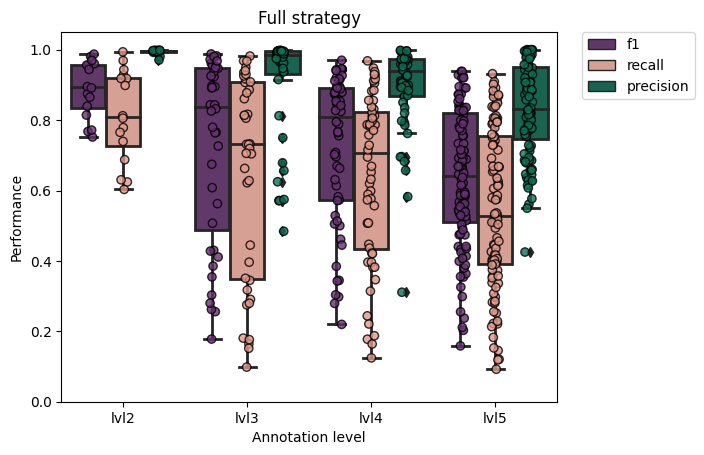

In [12]:
colors={"recall": "#e2998a","f1": "#663171","precision":"#0c7156"}

ax =sns.boxplot(x="level",y="score",hue="metric",data = melted,palette = colors,linewidth = 2,width = 0.85)
sns.stripplot(x="level",y="score", dodge=True,hue="metric",data = melted,size = 6,edgecolor = 'black',linewidth= 1,
              jitter = True,alpha =0.8,palette = colors)
plt.ylim([0,1.05])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Annotation level')
plt.ylabel('Performance')

# Add a title
plt.title('Full strategy')
plt.savefig(os.path.join(path_output_script,pre + '_full_strategy.pdf'),bbox_inches='tight')
plt.show()
plt.close()

# First two hierarchies

In [13]:
gating_dir_lvl2 = os.path.join(path_gating_hull,'P02_cell_type_lvl2_hull')
overview_2h_lvl2 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in cluster_lvl2:
        perf_loc = os.path.join(gating_dir_lvl2,sample,cluster,'performance.csv')
        f1,recall,precision,hierarchy = hr.get_f1_hierarch_max2hierarch(perf_loc)
        overview_2h_lvl2 = overview_2h_lvl2.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))
overview_2h_lvl2['level'] = 'lvl2'

gating_dir_lvl3 = os.path.join(path_gating_hull,'P02_cell_type_lvl3_hull') 
overview_2h_lvl3 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in cluster_lvl3:
        perf_loc = os.path.join(gating_dir_lvl3,sample,cluster,'performance.csv')
        f1,recall,precision,hierarchy = hr.get_f1_hierarch_max2hierarch(perf_loc)
        overview_2h_lvl3 = overview_2h_lvl3.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))
overview_2h_lvl3['level'] = 'lvl3'

gating_dir_lvl4 = os.path.join(path_gating_hull,'P02_cell_type_lvl4_hull')  
overview_2h_lvl4 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in cluster_lvl4:
        perf_loc = os.path.join(gating_dir_lvl4,sample,cluster,'performance.csv')
        f1,recall,precision,hierarchy = hr.get_f1_hierarch_max2hierarch(perf_loc)
        overview_2h_lvl4 = overview_2h_lvl4.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))
overview_2h_lvl4['level'] = 'lvl4'

gating_dir_lvl5 = os.path.join(path_gating_hull,'P02_cell_type_lvl5_hull') 
overview_2h_lvl5 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in cluster_lvl5:
        perf_loc = os.path.join(gating_dir_lvl5,sample,cluster,'performance.csv')
        f1,recall,precision,hierarchy = hr.get_f1_hierarch_max2hierarch(perf_loc)
        overview_2h_lvl5 = overview_2h_lvl5.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))
overview_2h_lvl5['level'] = 'lvl5'

In [14]:
overview_2h = overview_2h_lvl2.append(overview_2h_lvl3.append(overview_2h_lvl4.append(overview_2h_lvl5)))

melted_2h = pd.melt(overview_2h[['f1','recall','precision','level']],id_vars=['level'])
melted_2h.rename(columns = {'value':'score', 'variable':'metric'}, inplace = True)

In [15]:
#save before plotting
melted_2h.to_csv(os.path.join(path_output_script,pre + '_melted_2h_first_two_hierachies.csv'))

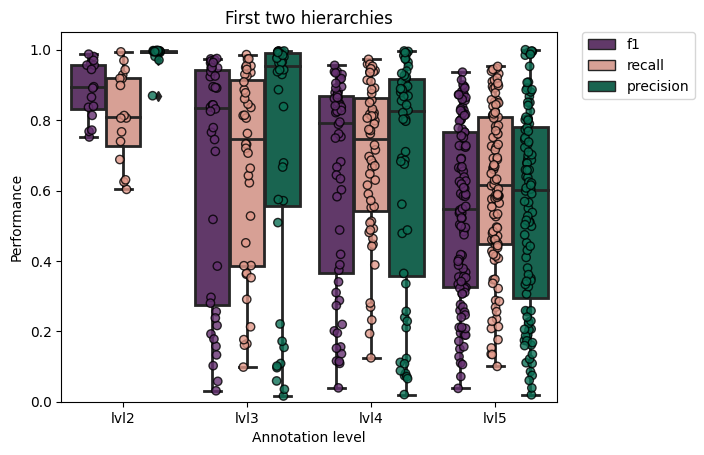

In [16]:
colors={"recall": "#e2998a","f1": "#663171","precision":"#0c7156"}

ax =sns.boxplot(x="level",y="score",hue="metric",data = melted_2h,palette = colors,linewidth = 2,width = 0.85)
sns.stripplot(x="level",y="score", dodge=True,hue="metric",data = melted_2h,size = 6,edgecolor = 'black',linewidth= 1,
              jitter = True,alpha =0.8,palette = colors)
plt.ylim([0,1.05])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Annotation level')
plt.ylabel('Performance')

# Add a title
plt.title('First two hierarchies')
plt.savefig(os.path.join(path_output_script,pre + '_first_two_hierachies.pdf'),bbox_inches='tight')
plt.show()
plt.close()

# Hierachies

In [17]:
melted_hierarchy = pd.melt(overview,id_vars=['level'],value_vars = ['hierarchy'])


<AxesSubplot: xlabel='level', ylabel='value'>

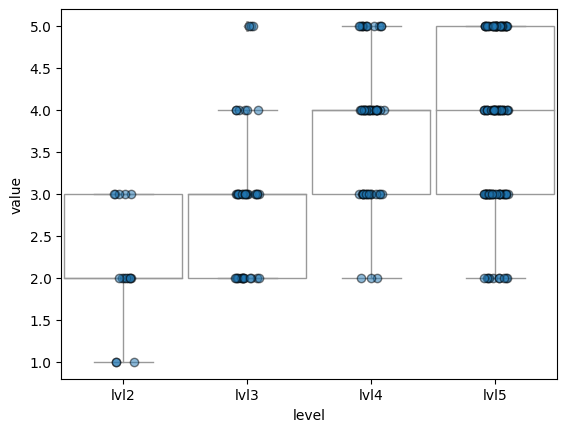

In [18]:
colors_hierarchy={"lvl2": "#FFFFFF","lvl3": "#FFFFFF","lvl4":"#FFFFFF","lvl5":"#FFFFFF"}

sns.boxplot(x="level",y="value",data = melted_hierarchy,linewidth = 1,width = 0.95,palette = colors_hierarchy)
sns.stripplot(x="level",y="value", dodge=True,data = melted_hierarchy,size = 6,edgecolor = 'black',linewidth= 1,
              jitter = True,alpha =0.5)

In [19]:
df_hierachies = pd.DataFrame(overview[['level','hierarchy']].value_counts())
df_hierachies.rename(columns={0: 'Frequency'}, inplace=True)
pivot_df = df_hierachies.pivot_table(index='level', columns='hierarchy', values='Frequency', aggfunc='sum').fillna(0)
norm_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)*100

In [20]:
#save before plotting
norm_df.to_csv(os.path.join(path_output_script,pre + '_norm_df_gating_depth_heatmap.csv'))

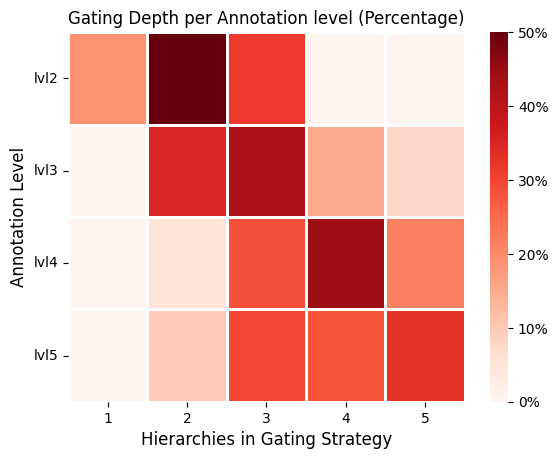

In [21]:
#plt.figure(figsize=(8, 6))
sns.heatmap(norm_df, annot=False, cmap='Reds', fmt='.2f', linewidths=2,cbar_kws={'format': '%.0f%%'})
plt.xlabel('Hierarchies in Gating Strategy',fontsize = 12)
plt.ylabel('Annotation Level',fontsize = 12)
plt.title('Gating Depth per Annotation level (Percentage)', fontsize = 12)
plt.gca().tick_params(axis='y', rotation=0)
plt.savefig(os.path.join(path_output_script,pre + '_gating_depth_heatmap.pdf'),bbox_inches='tight')
plt.show()
plt.close()

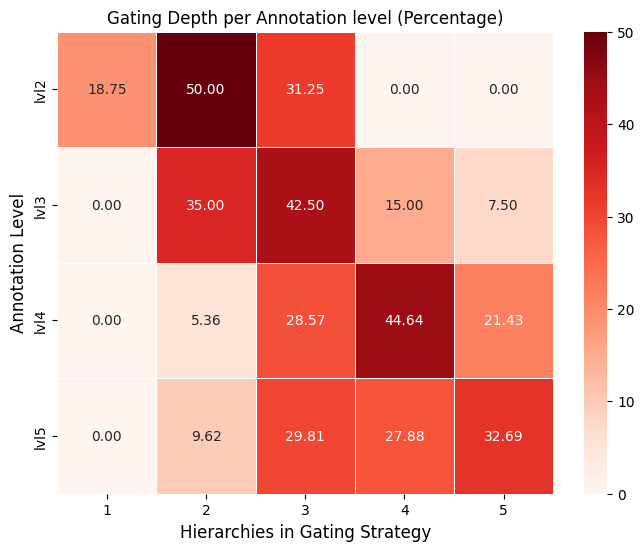

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(norm_df, annot=True, cmap='Reds', fmt='.2f', linewidths=0.5)
plt.xlabel('Hierarchies in Gating Strategy',fontsize = 12)
plt.ylabel('Annotation Level',fontsize = 12)
plt.title('Gating Depth per Annotation level (Percentage)', fontsize = 12)
plt.show()

# used markers

In [23]:
def return_marker_combo_df(meta_info,run_ID,hierarchy):
    marker = meta_info['gating_summary'][run_ID][1][hierarchy]['marker_combo']
    marker_df = pd.DataFrame(marker,columns = ['marker'])
    marker_df['hierarchy'] = hierarchy
    marker_df['cluster'] = meta_info['clusterkeys'][run_ID]
    return marker_df

def get_markers_df(meta_info,level,sample,overview_lvl):
    run_IDs = len(meta_info['clusterkeys'])
    df_ct_meta = pd.DataFrame(columns = ['marker','hierarchy','cluster','level','sample'])
    for run_ID in range(run_IDs):
        df_ct = pd.DataFrame(columns = ['marker','hierarchy','cluster'])
        max_hierarchies = get_best_hierarchy(meta_info,level,sample,run_ID,overview_lvl)
        for hierarch in range(1,max_hierarchies+1):
            df_ct = df_ct.append(return_marker_combo_df(meta_info,run_ID,str(hierarch)))
        df_ct['level'] = level
        df_ct['sample'] = sample
        df_ct_meta = df_ct_meta.append(df_ct)
    return df_ct_meta

def get_best_hierarchy(meta_info,level,sample,run_ID,overview_lvl):
    cluster_string = 'cluster_' + meta_info['clusterkeys'][run_ID]
    condition1 = overview_lvl['cluster'] == cluster_string
    condition2 = overview_lvl['sample'] == sample
    condition3 = overview_lvl['level'] == level
    max_hierarchy = overview_lvl[condition1&condition2&condition3]['hierarchy'][0]
    return max_hierarchy

def get_best_hierarchy_max_2_hierachies(meta_info,level,sample,run_ID,overview_lvl):
    cluster_string = 'cluster_' + meta_info['clusterkeys'][run_ID]
    condition1 = overview_lvl['cluster'] == cluster_string
    condition2 = overview_lvl['sample'] == sample
    condition3 = overview_lvl['level'] == level
    max_hierarchy = overview_lvl[condition1&condition2&condition3]['hierarchy'][0]
    if max_hierarchy > 2:
        max_hierarchy = 2
    return max_hierarchy

def get_markers_df_max_2_hierachies(meta_info,level,sample,overview_lvl):
    run_IDs = len(meta_info['clusterkeys'])
    df_ct_meta = pd.DataFrame(columns = ['marker','hierarchy','cluster','level','sample'])
    for run_ID in range(run_IDs):
        df_ct = pd.DataFrame(columns = ['marker','hierarchy','cluster'])
        max_hierarchies = get_best_hierarchy_max_2_hierachies(meta_info,level,sample,run_ID,overview_lvl)
        for hierarch in range(1,max_hierarchies+1):
            df_ct = df_ct.append(return_marker_combo_df(meta_info,run_ID,str(hierarch)))
        df_ct['level'] = level
        df_ct['sample'] = sample
        df_ct_meta = df_ct_meta.append(df_ct)
    return df_ct_meta

# Full strategy marker count 

## level 2

In [24]:
samples = ['A','B','C','H','J','O','T','U']
out_lvl2 = pd.DataFrame(columns = ['marker','hierarchy','cluster','level','sample'])
for sample in samples:
    meta_info_path = os.path.join(os.getcwd(),'P01_cell_type_lvl2',sample,'meta_info.npy')
    meta_info = np.load(meta_info_path,allow_pickle=True).item()
    out = get_markers_df(meta_info,'lvl2',sample,overview_lvl2)
    out_lvl2 = out_lvl2.append(out)

print(out_lvl2['marker'].value_counts())
len(pd.unique(out_lvl2['marker']))

Er170Di    16
Lu175Di    10
Sm147Di     8
Nd143Di     7
Nd148Di     6
Ho165Di     4
Yb174Di     4
Dy164Di     4
Eu153Di     3
Nd145Di     3
Nd150Di     2
Eu151Di     1
Name: marker, dtype: int64


12

## level 3

In [25]:
samples = ['A','B','C','H','J','O','T','U']
out_lvl3 = pd.DataFrame(columns = ['marker','hierarchy','cluster','level','sample'])
for sample in samples:
    meta_info_path = os.path.join(os.getcwd(),'P01_cell_type_lvl3',sample,'meta_info.npy')
    meta_info = np.load(meta_info_path,allow_pickle=True).item()
    out = get_markers_df(meta_info,'lvl3',sample,overview_lvl3)
    out_lvl3 = out_lvl3.append(out)

print(out_lvl3['marker'].value_counts())
len(pd.unique(out_lvl3['marker']))

Er170Di    36
Nd145Di    33
Nd146Di    33
Nd148Di    24
Lu175Di    21
Yb174Di    11
Eu153Di    10
Dy164Di    10
Sm147Di     9
Yb172Di     6
Ho165Di     6
Yb171Di     6
Tb159Di     5
Eu151Di     4
Tm169Di     4
Sm149Di     4
Nd144Di     3
Nd143Di     3
Er167Di     2
Dy161Di     1
Dy162Di     1
Gd155Di     1
Sm152Di     1
Gd160Di     1
Yb176Di     1
Name: marker, dtype: int64


25

## level 4

In [26]:
samples = ['A','B','C','H','J','O','T','U']
out_lvl4 = pd.DataFrame(columns = ['marker','hierarchy','cluster','level','sample'])
for sample in samples:
    meta_info_path = os.path.join(os.getcwd(),'P01_cell_type_lvl4',sample,'meta_info.npy')
    meta_info = np.load(meta_info_path,allow_pickle=True).item()
    out = get_markers_df(meta_info,'lvl4',sample,overview_lvl4)
    out_lvl4 = out_lvl4.append(out)

print(out_lvl4['marker'].value_counts())
len(pd.unique(out_lvl4['marker']))

Nd145Di    48
Nd146Di    42
Tb159Di    40
Nd148Di    40
Er170Di    36
Dy164Di    27
Yb172Di    23
Lu175Di    19
Yb174Di    16
Eu153Di    15
Dy162Di    14
Eu151Di    12
Tm169Di    11
Yb171Di    10
Gd158Di    10
Ho165Di    10
Sm149Di     9
Er167Di     9
Sm147Di     9
Gd155Di     8
Nd144Di     6
Sm152Di     5
Nd143Di     3
Yb176Di     3
Nd142Di     1
Er168Di     1
Gd156Di     1
Name: marker, dtype: int64


27

## level 5

In [27]:
samples = ['A','B','C','H','J','O','T','U']
out_lvl5 = pd.DataFrame(columns = ['marker','hierarchy','cluster','level','sample'])
for sample in samples:
    meta_info_path = os.path.join(os.getcwd(),'P01_cell_type_lvl5',sample,'meta_info.npy')
    meta_info = np.load(meta_info_path,allow_pickle=True).item()
    out = get_markers_df(meta_info,'lvl5',sample,overview_lvl5)
    out_lvl5 = out_lvl5.append(out)

sample = 'B'
meta_info_path = os.path.join(os.getcwd(),'P01_cell_type_lvl5Temra_B',sample,'meta_info.npy')
meta_info = np.load(meta_info_path,allow_pickle=True).item()
out = get_markers_df(meta_info,'lvl5',sample,overview_lvl5)
out_lvl5 = out_lvl5.append(out)

sample = 'B'
meta_info_path = os.path.join(os.getcwd(),'P01_cell_type_lvl5TRM_B',sample,'meta_info.npy')
meta_info = np.load(meta_info_path,allow_pickle=True).item()
out = get_markers_df(meta_info,'lvl5',sample,overview_lvl5)
out_lvl5 = out_lvl5.append(out)

sample = 'J'
meta_info_path = os.path.join(os.getcwd(),'P01_cell_type_lvl5Temra_J',sample,'meta_info.npy')
meta_info = np.load(meta_info_path,allow_pickle=True).item()
out = get_markers_df(meta_info,'lvl5',sample,overview_lvl5)
out_lvl5 = out_lvl5.append(out)


#print(out_lvl5['marker'].value_counts())
len(pd.unique(out_lvl5['marker']))

31

# First two hierarchies marker count

## level 2

In [28]:
samples = ['A','B','C','H','J','O','T','U']
out_2h_lvl2 = pd.DataFrame(columns = ['marker','hierarchy','cluster','level','sample'])
for sample in samples:
    meta_info_path = os.path.join(os.getcwd(),'P01_cell_type_lvl2',sample,'meta_info.npy')
    meta_info = np.load(meta_info_path,allow_pickle=True).item()
    out_2h_ = get_markers_df_max_2_hierachies(meta_info,'lvl2',sample,overview_lvl2)
    out_2h_lvl2 = out_2h_lvl2.append(out_2h_)

print(out_2h_lvl2['marker'].value_counts())
len(pd.unique(out_2h_lvl2['marker']))

Er170Di    16
Sm147Di     7
Nd143Di     7
Lu175Di     6
Nd148Di     6
Dy164Di     4
Yb174Di     3
Eu153Di     3
Nd150Di     2
Nd145Di     2
Eu151Di     1
Ho165Di     1
Name: marker, dtype: int64


12

## level 3 

In [29]:
samples = ['A','B','C','H','J','O','T','U']
out_2h_lvl3 = pd.DataFrame(columns = ['marker','hierarchy','cluster','level','sample'])
for sample in samples:
    meta_info_path = os.path.join(os.getcwd(),'P01_cell_type_lvl3',sample,'meta_info.npy')
    meta_info = np.load(meta_info_path,allow_pickle=True).item()
    out_2h_ = get_markers_df_max_2_hierachies(meta_info,'lvl3',sample,overview_lvl3)
    out_2h_lvl3 = out_2h_lvl3.append(out_2h_)

print(out_2h_lvl3['marker'].value_counts())
len(pd.unique(out_2h_lvl3['marker']))

Er170Di    31
Nd145Di    27
Nd146Di    22
Nd148Di    20
Lu175Di    14
Sm147Di     8
Eu153Di     7
Yb174Di     6
Dy164Di     6
Tb159Di     4
Eu151Di     3
Yb171Di     3
Yb172Di     3
Sm149Di     2
Nd143Di     2
Ho165Di     1
Tm169Di     1
Name: marker, dtype: int64


17

## level 4 

In [30]:
samples = ['A','B','C','H','J','O','T','U']
out_2h_lvl4 = pd.DataFrame(columns = ['marker','hierarchy','cluster','level','sample'])
for sample in samples:
    meta_info_path = os.path.join(os.getcwd(),'P01_cell_type_lvl4',sample,'meta_info.npy')
    meta_info = np.load(meta_info_path,allow_pickle=True).item()
    out_2h_ = get_markers_df_max_2_hierachies(meta_info,'lvl4',sample,overview_lvl4)
    out_2h_lvl4 = out_2h_lvl4.append(out_2h_)

print(out_2h_lvl4['marker'].value_counts())
len(pd.unique(out_2h_lvl4['marker']))

Nd145Di    31
Er170Di    31
Nd148Di    29
Nd146Di    29
Tb159Di    27
Dy164Di    15
Yb172Di     9
Sm147Di     8
Dy162Di     5
Lu175Di     5
Eu153Di     5
Er167Di     5
Yb174Di     5
Gd155Di     4
Yb171Di     3
Eu151Di     3
Tm169Di     2
Sm149Di     2
Nd143Di     2
Ho165Di     1
Yb176Di     1
Gd158Di     1
Er168Di     1
Name: marker, dtype: int64


23

## level 5 

In [31]:
samples = ['A','B','C','H','J','O','T','U']
out_2h_lvl5 = pd.DataFrame(columns = ['marker','hierarchy','cluster','level','sample'])
for sample in samples:
    meta_info_path = os.path.join(os.getcwd(),'P01_cell_type_lvl5',sample,'meta_info.npy')
    meta_info = np.load(meta_info_path,allow_pickle=True).item()
    out_2h = get_markers_df_max_2_hierachies(meta_info,'lvl5',sample,overview_lvl5)
    out_2h_lvl5 = out_2h_lvl5.append(out_2h)

sample = 'B'
meta_info_path = os.path.join(os.getcwd(),'P01_cell_type_lvl5Temra_B',sample,'meta_info.npy')
meta_info = np.load(meta_info_path,allow_pickle=True).item()
out_2h = get_markers_df_max_2_hierachies(meta_info,'lvl5',sample,overview_lvl5)
out_2h_lvl5 = out_2h_lvl5.append(out_2h)

sample = 'B'
meta_info_path = os.path.join(os.getcwd(),'P01_cell_type_lvl5TRM_B',sample,'meta_info.npy')
meta_info = np.load(meta_info_path,allow_pickle=True).item()
out_2h = get_markers_df_max_2_hierachies(meta_info,'lvl5',sample,overview_lvl5)
out_2h_lvl5 = out_2h_lvl5.append(out_2h)

sample = 'J'
meta_info_path = os.path.join(os.getcwd(),'P01_cell_type_lvl5Temra_J',sample,'meta_info.npy')
meta_info = np.load(meta_info_path,allow_pickle=True).item()
out_2h = get_markers_df_max_2_hierachies(meta_info,'lvl5',sample,overview_lvl5)
out_2h_lvl5 = out_2h_lvl5.append(out_2h)


print(out_2h_lvl5['marker'].value_counts())
len(pd.unique(out_2h_lvl5['marker']))

Nd145Di    65
Nd146Di    55
Tb159Di    44
Nd148Di    41
Er170Di    37
Tm169Di    31
Dy164Di    29
Yb172Di    22
Yb174Di    18
Dy162Di    11
Er167Di    10
Sm147Di    10
Eu151Di     9
Yb171Di     6
Gd158Di     5
Gd155Di     5
Nd143Di     4
Sm149Di     4
Yb176Di     3
Lu175Di     2
Yb173Di     1
Eu153Di     1
Ho165Di     1
Nd150Di     1
Gd156Di     1
Name: marker, dtype: int64


25

### summarize 

In [32]:
row_names = ['lvl2','lvl3','lvl4','lvl5']
column_names = ['full strategy','first two hierarchies']

df = pd.DataFrame(columns = column_names)

full_nr_markers = [len(pd.unique(out_lvl2['marker'])),len(pd.unique(out_lvl3['marker'])),len(pd.unique(out_lvl4['marker'])),len(pd.unique(out_lvl5['marker']))]

nr_markers_2h = [len(pd.unique(out_2h_lvl2['marker'])),len(pd.unique(out_2h_lvl3['marker'])),len(pd.unique(out_2h_lvl4['marker'])),len(pd.unique(out_2h_lvl5['marker']))]

df['full strategy'] = full_nr_markers
df['first two hierarchies'] = nr_markers_2h

df.index = row_names

In [33]:
colors = ["#591c19", "#b64f32"]

In [34]:
#save before plotting
df.to_csv(os.path.join(path_output_script,pre + '_df_marker_consumption.csv'))

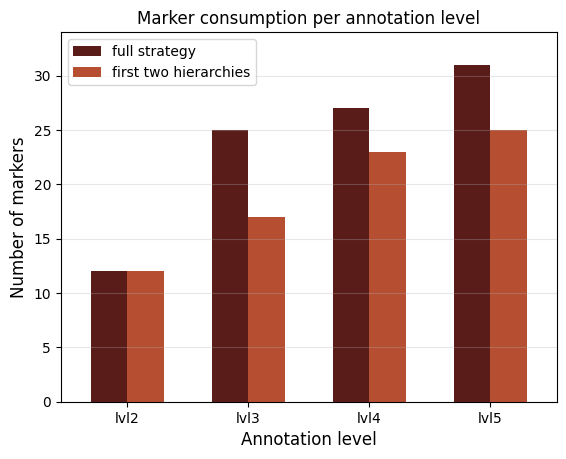

In [35]:
df.plot(kind = 'bar',width=0.6,color = colors)
plt.gca().tick_params(axis='x', rotation=0)
plt.grid(axis = 'y',alpha = 0.3)
plt.xlabel('Annotation level',fontsize = 12)
plt.ylabel('Number of markers',fontsize = 12)
plt.title('Marker consumption per annotation level',fontsize = 12)
plt.ylim([0,34])
plt.savefig(os.path.join(path_output_script,pre + '_marker_consumption.pdf'),bbox_inches='tight')
plt.show()
plt.close()

# Closer look on level 5

In [36]:
df_full = pd.DataFrame(out_lvl5['marker'].value_counts())

In [37]:
df_2h = pd.DataFrame(out_2h_lvl5['marker'].value_counts())

In [38]:
df_full = df_full.rename(columns={'marker':'marker_full'})

df_2h = df_2h.rename(columns={'marker':'marker_2h'})

In [39]:
df_merged = pd.concat([df_full,df_2h],axis = 1)

In [40]:
df_merged = df_merged.fillna(0)

add AB names

In [41]:
oetjen_all = sc.read_h5ad('oetjen_all.h5ad')

df_merged_AB = pd.concat([df_merged,oetjen_all.var],axis = 1)

df_merged_AB.index = df_merged_AB['AB']

df_merged_AB = df_merged_AB[['marker_full','marker_2h']]

In [42]:
colors = ["#591c19", "#b64f32"]

In [43]:
#save before plotting
df_merged.to_csv(os.path.join(path_output_script,pre + '_df_merged_marker_frequencies.csv'))

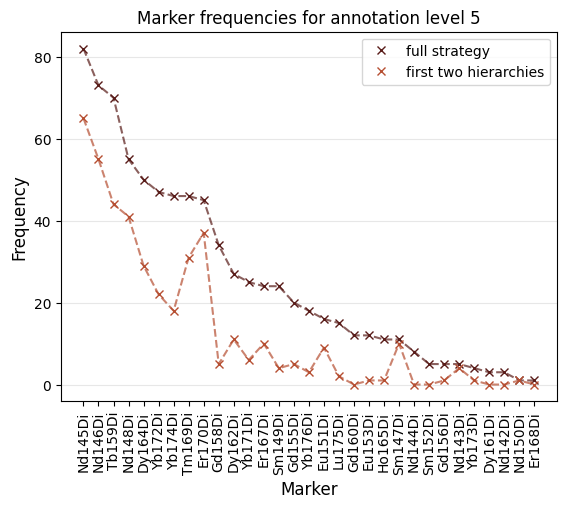

In [44]:
plt.plot(df_merged.index,df_merged['marker_full'],'x',color = "#591c19",markersize = 6,label = 'full strategy')
plt.plot(df_merged.index,df_merged['marker_full'],'--',color = "#591c19",alpha = 0.7)
plt.plot(df_merged.index,df_merged['marker_2h'],'x',color = "#b64f32",label = 'first two hierarchies',markersize = 6)
plt.plot(df_merged.index,df_merged['marker_2h'],'--',color = "#b64f32",alpha = 0.7)
plt.gca().tick_params(axis='x', rotation=90)
plt.grid(axis = 'y',alpha = 0.3)
plt.xlabel('Marker',fontsize = 12)
plt.ylabel('Frequency',fontsize = 12)
plt.title('Marker frequencies for annotation level 5',fontsize = 12)
plt.legend()
plt.savefig(os.path.join(path_output_script,pre + '_marker_frequencies.pdf'),bbox_inches='tight')
plt.show()
plt.close()

In [45]:
#save before plotting
df_merged_AB.to_csv(os.path.join(path_output_script,pre + '_df_merged_AB_marker_frequencies.csv'))

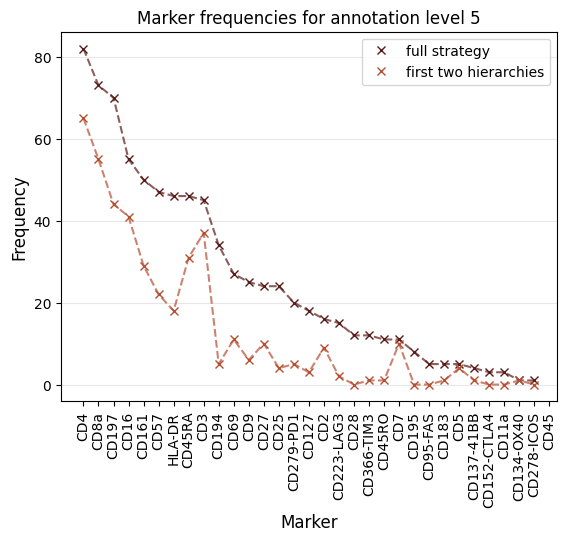

In [46]:
plt.plot(df_merged_AB.index,df_merged_AB['marker_full'],'x',color = "#591c19",markersize = 6,label = 'full strategy')
plt.plot(df_merged_AB.index,df_merged_AB['marker_full'],'--',color = "#591c19",alpha = 0.7)
plt.plot(df_merged_AB.index,df_merged_AB['marker_2h'],'x',color = "#b64f32",label = 'first two hierarchies',markersize = 6)
plt.plot(df_merged_AB.index,df_merged_AB['marker_2h'],'--',color = "#b64f32",alpha = 0.7)
plt.gca().tick_params(axis='x', rotation=90)
plt.grid(axis = 'y',alpha = 0.3)
plt.xlabel('Marker',fontsize = 12)
plt.ylabel('Frequency',fontsize = 12)
plt.title('Marker frequencies for annotation level 5',fontsize = 12)
plt.legend()
plt.savefig(os.path.join(path_output_script,pre + '_marker_frequencies_AB.pdf'),bbox_inches='tight')
plt.show()
plt.close()

## Save session

In [47]:
hr.save_package_versions(hr.return_base_package_version_path(),pre = pre,do_print = True)
sc.logging.print_versions()
end_time = hr.get_time()
hr.get_time_delta(start_time,end_time,pre=pre,save=True)

babel==2.13.1
qtpy==2.4.1
sqlalchemy==2.0.23
send2trash==1.8.2
anyio==4.1.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs==23.1.0
beautifulsoup4==4.12.2
bleach==6.1.0
certifi==2023.11.17
cffi==1.16.0
charset-normalizer==3.3.2
colorama==0.4.6
comm==0.2.0
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
exceptiongroup==1.2.0
executing==2.0.1
fastjsonschema==2.19.0
fqdn==1.5.1
greenlet==3.0.1
idna==3.6
importlib-metadata==7.0.0
ipykernel==6.27.1
ipython==8.18.1
ipython-genutils==0.2.0
ipython-sql==0.5.0
ipywidgets==8.1.1
isoduration==20.11.0
jedi==0.19.1
json5==0.9.14
jsonpointer==2.4
jsonschema==4.20.0
jsonschema-specifications==2023.11.2
jupyter==1.0.0
jupyter-client==8.6.0
jupyter-console==6.6.3
jupyter-core==5.5.0
jupyter-events==0.9.0
jupyter-lsp==2.2.1
jupyter-server==2.11.2
jupyter-server-terminals==0.4.4
jupyterlab==4.0.9
jupyterlab-pygments==0.3.0
jupyterlab-server==2.25.2
jupyterlab-widgets==3.0.9
matplotlib-inline==0.1.6


datetime.timedelta(seconds=32, microseconds=501747)